# DE LAGREVOL Regis & LI Ludovic

In [1]:
#pip install tensorflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [3]:
data=pd.read_csv("SkillCraft1_Dataset.csv")
data.rename(columns={'GameID': 'GamerID'}, inplace=True) #erreur sur le nom de la colonne
data

,GamerID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


### Nettoyage du dataset

In [4]:
data.replace("?",np.nan,inplace=True) 
data.dropna(inplace=True) # perte de 57 lignes, négligeable
data

,GamerID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,9261,4,20,8,400,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,9264,5,16,56,1500,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3338,9270,3,20,28,400,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


In [5]:
data.dtypes

GamerID                   int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [6]:
data["Age"]=pd.to_numeric(data["Age"])
data["HoursPerWeek"]=pd.to_numeric(data["HoursPerWeek"])
data["TotalHours"]=pd.to_numeric(data["TotalHours"])

In [7]:
data.dtypes

GamerID                   int64
LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

### Matrice de corrélation

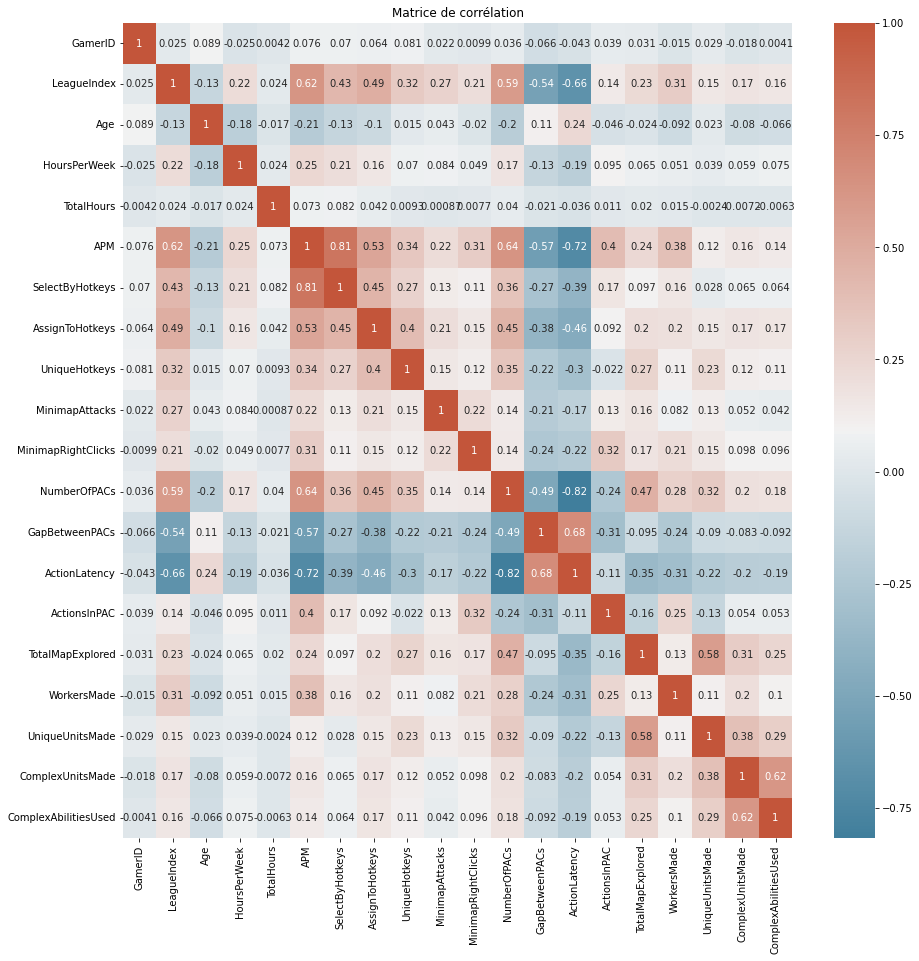

In [8]:
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr=data.corr()
sns.heatmap(corr,cmap=cmap,xticklabels=corr.columns.values,yticklabels=corr.columns.values,ax=ax,annot=True)
plt.title("Matrice de corrélation")
plt.show()

### Treemap

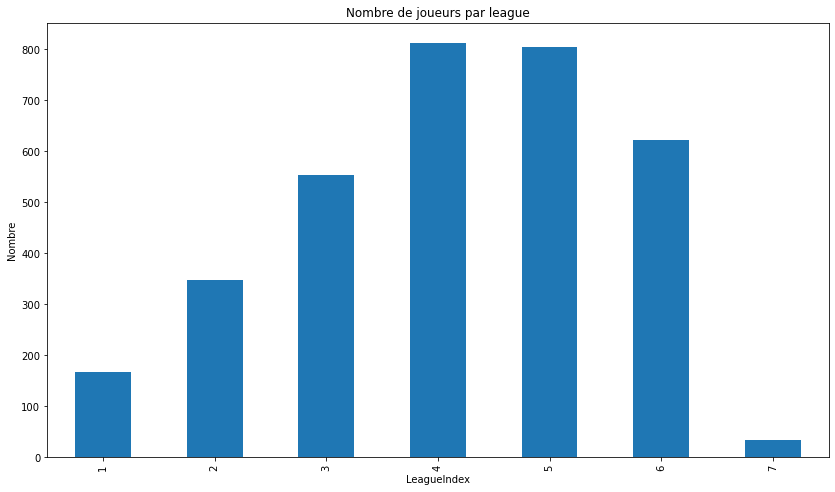

In [9]:
plt.figure(figsize=(14,8))
data["LeagueIndex"].value_counts()[[1,2,3,4,5,6,7]].plot(kind='bar',title="Nombre de joueurs par league")
plt.xlabel("LeagueIndex")
plt.ylabel("Nombre")
plt.show()

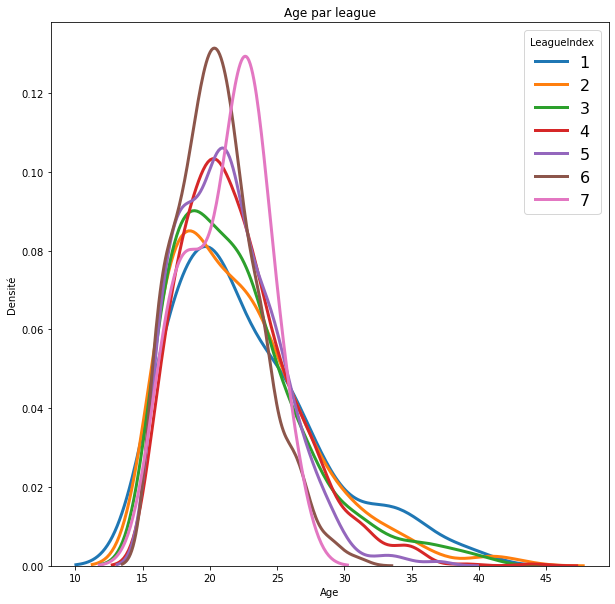

In [10]:
labels = [1,2,3,4,5,6,7,8]

plt.figure(figsize=(10,10))
for label in labels:
    subset = data[data['LeagueIndex'] == label]
    sns.distplot(subset['Age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = label)

plt.legend(prop={'size': 16}, title = 'LeagueIndex')
plt.title('Age par league')
plt.xlabel('Age')
plt.ylabel('Densité')
plt.show()

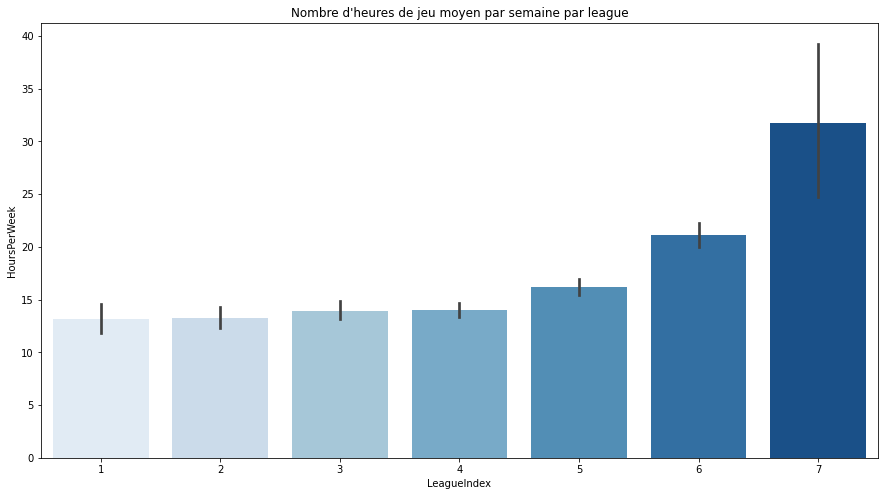

In [11]:
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='LeagueIndex', y='HoursPerWeek', data=data, palette="Blues").set_title("Nombre d'heures de jeu moyen par semaine par league")
plt.show()

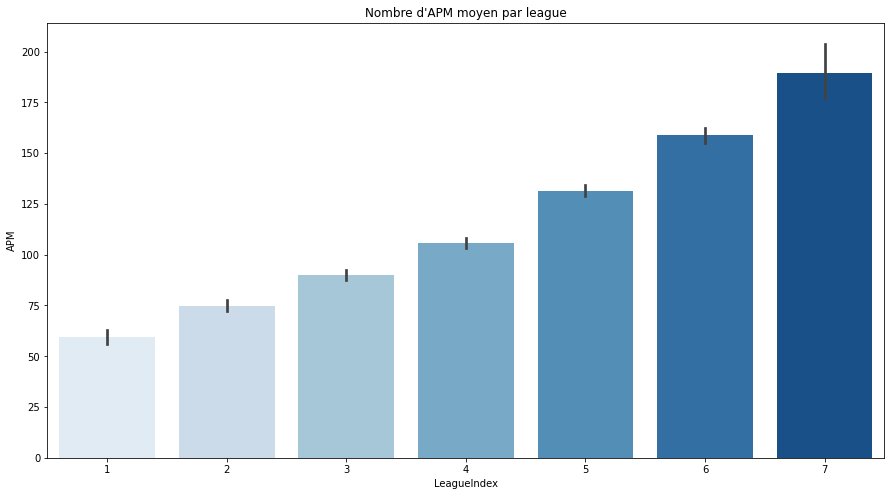

In [12]:
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='LeagueIndex', y='APM', data=data, palette="Blues").set_title("Nombre d'APM moyen par league")
plt.show()

### PCA

In [13]:
#Standardisation des données

x = data.drop(['GamerID',"LeagueIndex"], axis=1).values # GamerID nous sert à rien et LeagueIndex correspond à notre label
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 1.27198242, -0.49399595,  0.11778889, ..., -0.29107556,
        -0.5380093 , -0.53437903],
       [ 0.32089829, -0.49399595,  0.23329208, ..., -0.82906572,
        -0.5380093 ,  0.24711416],
       [ 1.98529551, -0.49399595, -0.04391557, ..., -0.29107556,
        -0.5380093 ,  0.17629523],
       ...,
       [-0.15464377, -0.66118225, -0.04969073, ...,  0.2469146 ,
        -0.5380093 , -0.53437903],
       [-0.3924148 ,  1.01068076, -0.03236525, ..., -0.82906572,
        -0.5380093 , -0.53437903],
       [ 0.08312726, -0.82836855, -0.03236525, ...,  0.78490476,
        -0.5380093 , -0.33148145]])

In [14]:
np.mean(x_scaled),np.std(x_scaled) # On a bien une moyenne d'environ 0 et un ecart-type de 1

(-3.48861771934674e-17, 1.0)

In [15]:
#ACP

pca=PCA(n_components=2)
principalComponents_data=pca.fit_transform(x_scaled)

In [16]:
principalComponents_data_df=pd.DataFrame(data = principalComponents_data, columns = ['principal component 1', 'principal component 2'])
principalComponents_data_df

,principal component 1,principal component 2
0,-1.274371,0.051485
1,-0.745125,-0.482421
2,1.465176,0.595369
3,0.322867,0.092537
4,0.670227,-2.636756
...,...,...
3333,-1.737052,0.041586
3334,-3.695952,0.266401
3335,-0.577956,-0.154053
3336,-0.099833,-1.694155


In [17]:
pca.explained_variance_ratio_

array([0.26761659, 0.11463846])

In [18]:
finalDf = pd.concat([principalComponents_data_df, data[['LeagueIndex']].reset_index(drop=True)], axis = 1) # 2 composantes principales avec les labels
finalDf

,principal component 1,principal component 2,LeagueIndex
0,-1.274371,0.051485,5
1,-0.745125,-0.482421,5
2,1.465176,0.595369,4
3,0.322867,0.092537,3
4,0.670227,-2.636756,3
...,...,...,...
3333,-1.737052,0.041586,4
3334,-3.695952,0.266401,5
3335,-0.577956,-0.154053,4
3336,-0.099833,-1.694155,3


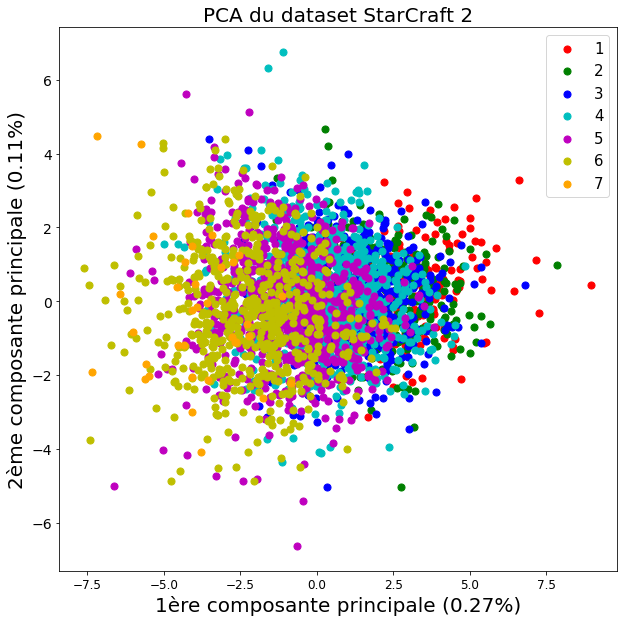

In [19]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('1ère composante principale'+' ('+str(round(pca.explained_variance_ratio_[0],2))+"%)",fontsize=20)
plt.ylabel('2ème composante principale'+' ('+str(round(pca.explained_variance_ratio_[1],2))+"%)",fontsize=20)
plt.title("PCA du dataset StarCraft 2",fontsize=20)
targets = [1,2,3,4,5,6,7]
colors = ['r','g','b','c','m','y','orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LeagueIndex'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

### K-means

In [20]:
# Clustering

kmeans = KMeans(n_clusters=7) 
label=kmeans.fit_predict(principalComponents_data)

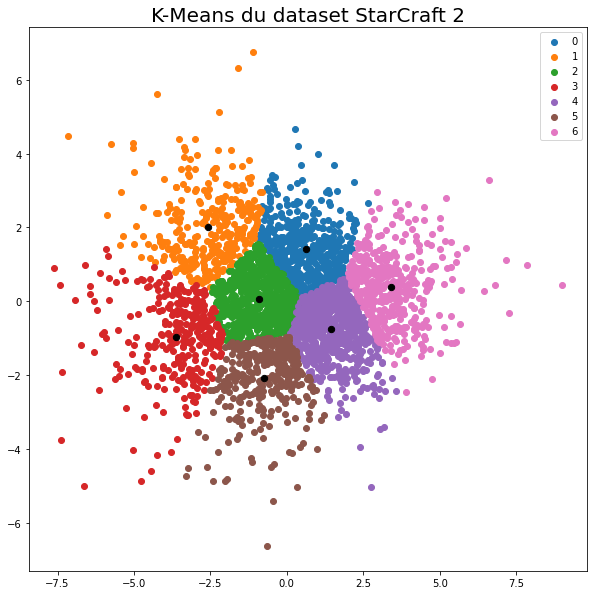

In [21]:
unique_labels = np.unique(label)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10,10))
plt.title("K-Means du dataset StarCraft 2",fontsize=20)
for i in unique_labels:
    plt.scatter(principalComponents_data[label == i , 0] , principalComponents_data[label == i , 1] , label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 40, color = "k")
plt.legend()
plt.show()

### TensorFlow

In [22]:
X=pd.DataFrame(x_scaled)
# ensure all data are floating point values
X = X.astype('float32')
y=data["LeagueIndex"]
y=y-1
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(30, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(7, activation = 'relu'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

(2236, 18) (1102, 18) (2236,) (1102,)


In [23]:
# fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=1500, batch_size=10000)

Epoch 1/1500
1/1 [==============================] - 1s 968ms/step - loss: 9.4986 - accuracy: 0.1740 - val_loss: 8.5878 - val_accuracy: 0.1996
Epoch 2/1500
1/1 [==============================] - 0s 43ms/step - loss: 9.0199 - accuracy: 0.1784 - val_loss: 8.1594 - val_accuracy: 0.2105
Epoch 3/1500
1/1 [==============================] - 0s 40ms/step - loss: 8.4770 - accuracy: 0.1923 - val_loss: 7.7255 - val_accuracy: 0.2223
Epoch 4/1500
1/1 [==============================] - 0s 45ms/step - loss: 7.9719 - accuracy: 0.2071 - val_loss: 7.5108 - val_accuracy: 0.2341
Epoch 5/1500
1/1 [==============================] - 0s 45ms/step - loss: 7.6566 - accuracy: 0.2165 - val_loss: 7.2686 - val_accuracy: 0.2323
Epoch 6/1500
1/1 [==============================] - 0s 38ms/step - loss: 7.3692 - accuracy: 0.2165 - val_loss: 7.0302 - val_accuracy: 0.2405
Epoch 7/1500
1/1 [==============================] - 0s 35ms/step - loss: 7.1956 - accuracy: 0.2187 - val_loss: 6.8802 - val_accuracy: 0.2432
Epoch 8/1500

Epoch 59/1500
1/1 [==============================] - 0s 33ms/step - loss: 3.1661 - accuracy: 0.3296 - val_loss: 3.1014 - val_accuracy: 0.3230
Epoch 60/1500
1/1 [==============================] - 0s 28ms/step - loss: 3.1635 - accuracy: 0.3287 - val_loss: 3.0985 - val_accuracy: 0.3230
Epoch 61/1500
1/1 [==============================] - 0s 30ms/step - loss: 3.1671 - accuracy: 0.3233 - val_loss: 3.0971 - val_accuracy: 0.3249
Epoch 62/1500
1/1 [==============================] - 0s 29ms/step - loss: 3.1660 - accuracy: 0.3180 - val_loss: 3.0996 - val_accuracy: 0.3294
Epoch 63/1500
1/1 [==============================] - 0s 28ms/step - loss: 3.1595 - accuracy: 0.3131 - val_loss: 3.1026 - val_accuracy: 0.3249
Epoch 64/1500
1/1 [==============================] - 0s 35ms/step - loss: 3.1622 - accuracy: 0.3126 - val_loss: 3.1060 - val_accuracy: 0.3276
Epoch 65/1500
1/1 [==============================] - 0s 34ms/step - loss: 3.1601 - accuracy: 0.3135 - val_loss: 3.1099 - val_accuracy: 0.3230
Epoch 

1/1 [==============================] - 0s 28ms/step - loss: 3.0626 - accuracy: 0.3457 - val_loss: 3.0978 - val_accuracy: 0.3348
Epoch 117/1500
1/1 [==============================] - 0s 31ms/step - loss: 3.0608 - accuracy: 0.3462 - val_loss: 3.0967 - val_accuracy: 0.3348
Epoch 118/1500
1/1 [==============================] - 0s 30ms/step - loss: 3.0548 - accuracy: 0.3457 - val_loss: 3.0954 - val_accuracy: 0.3348
Epoch 119/1500
1/1 [==============================] - 0s 37ms/step - loss: 3.0519 - accuracy: 0.3470 - val_loss: 3.0942 - val_accuracy: 0.3358
Epoch 120/1500
1/1 [==============================] - 0s 38ms/step - loss: 3.0498 - accuracy: 0.3479 - val_loss: 3.0930 - val_accuracy: 0.3367
Epoch 121/1500
1/1 [==============================] - 0s 37ms/step - loss: 3.0479 - accuracy: 0.3475 - val_loss: 3.0918 - val_accuracy: 0.3358
Epoch 122/1500
1/1 [==============================] - 0s 39ms/step - loss: 3.0460 - accuracy: 0.3484 - val_loss: 3.0908 - val_accuracy: 0.3358
Epoch 123/1500

1/1 [==============================] - 0s 31ms/step - loss: 2.9557 - accuracy: 0.3685 - val_loss: 3.1794 - val_accuracy: 0.3530
Epoch 174/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.9537 - accuracy: 0.3694 - val_loss: 3.1786 - val_accuracy: 0.3539
Epoch 175/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.9517 - accuracy: 0.3685 - val_loss: 3.1731 - val_accuracy: 0.3539
Epoch 176/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.9496 - accuracy: 0.3694 - val_loss: 3.1795 - val_accuracy: 0.3539
Epoch 177/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.9475 - accuracy: 0.3699 - val_loss: 3.1779 - val_accuracy: 0.3548
Epoch 178/1500
1/1 [==============================] - 0s 38ms/step - loss: 2.9454 - accuracy: 0.3703 - val_loss: 3.1767 - val_accuracy: 0.3557
Epoch 179/1500
1/1 [==============================] - 0s 40ms/step - loss: 2.9433 - accuracy: 0.3699 - val_loss: 3.1756 - val_accuracy: 0.3548
Epoch 180/1500

1/1 [==============================] - 0s 30ms/step - loss: 2.9046 - accuracy: 0.3806 - val_loss: 3.2858 - val_accuracy: 0.3321
Epoch 231/1500
1/1 [==============================] - 0s 30ms/step - loss: 2.8942 - accuracy: 0.3824 - val_loss: 3.2905 - val_accuracy: 0.3330
Epoch 232/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.8812 - accuracy: 0.3851 - val_loss: 3.2961 - val_accuracy: 0.3348
Epoch 233/1500
1/1 [==============================] - 0s 35ms/step - loss: 2.8819 - accuracy: 0.3869 - val_loss: 3.2846 - val_accuracy: 0.3339
Epoch 234/1500
1/1 [==============================] - 0s 30ms/step - loss: 2.8760 - accuracy: 0.3895 - val_loss: 3.2802 - val_accuracy: 0.3321
Epoch 235/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.8625 - accuracy: 0.3904 - val_loss: 3.2830 - val_accuracy: 0.3339
Epoch 236/1500
1/1 [==============================] - 0s 32ms/step - loss: 2.8642 - accuracy: 0.3931 - val_loss: 3.2918 - val_accuracy: 0.3339
Epoch 237/1500

1/1 [==============================] - 0s 33ms/step - loss: 2.7021 - accuracy: 0.4034 - val_loss: 3.4688 - val_accuracy: 0.3503
Epoch 288/1500
1/1 [==============================] - 0s 32ms/step - loss: 2.6944 - accuracy: 0.4056 - val_loss: 3.4481 - val_accuracy: 0.3530
Epoch 289/1500
1/1 [==============================] - 0s 31ms/step - loss: 2.6951 - accuracy: 0.4070 - val_loss: 3.4374 - val_accuracy: 0.3530
Epoch 290/1500
1/1 [==============================] - 0s 30ms/step - loss: 2.6948 - accuracy: 0.4092 - val_loss: 3.4171 - val_accuracy: 0.3575
Epoch 291/1500
1/1 [==============================] - 0s 31ms/step - loss: 2.7049 - accuracy: 0.4101 - val_loss: 3.4638 - val_accuracy: 0.3530
Epoch 292/1500
1/1 [==============================] - 0s 32ms/step - loss: 2.6958 - accuracy: 0.4092 - val_loss: 3.4684 - val_accuracy: 0.3530
Epoch 293/1500
1/1 [==============================] - 0s 30ms/step - loss: 2.6806 - accuracy: 0.4088 - val_loss: 3.4728 - val_accuracy: 0.3512
Epoch 294/1500

1/1 [==============================] - 0s 35ms/step - loss: 2.9824 - accuracy: 0.2773 - val_loss: 3.0847 - val_accuracy: 0.2877
Epoch 345/1500
1/1 [==============================] - 0s 29ms/step - loss: 3.0216 - accuracy: 0.2759 - val_loss: 3.0742 - val_accuracy: 0.2940
Epoch 346/1500
1/1 [==============================] - 0s 29ms/step - loss: 3.0143 - accuracy: 0.2782 - val_loss: 3.0891 - val_accuracy: 0.2949
Epoch 347/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.9616 - accuracy: 0.2831 - val_loss: 3.0699 - val_accuracy: 0.2958
Epoch 348/1500
1/1 [==============================] - 0s 26ms/step - loss: 2.8816 - accuracy: 0.2898 - val_loss: 3.0092 - val_accuracy: 0.2985
Epoch 349/1500
1/1 [==============================] - 0s 26ms/step - loss: 2.7986 - accuracy: 0.2987 - val_loss: 2.9511 - val_accuracy: 0.3031
Epoch 350/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.7615 - accuracy: 0.3023 - val_loss: 2.8852 - val_accuracy: 0.3067
Epoch 351/1500

1/1 [==============================] - 0s 33ms/step - loss: 2.1164 - accuracy: 0.3345 - val_loss: 2.5703 - val_accuracy: 0.2822
Epoch 402/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.1015 - accuracy: 0.3359 - val_loss: 2.5712 - val_accuracy: 0.2813
Epoch 403/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.0972 - accuracy: 0.3359 - val_loss: 2.5708 - val_accuracy: 0.2768
Epoch 404/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.1013 - accuracy: 0.3363 - val_loss: 2.5739 - val_accuracy: 0.2786
Epoch 405/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.1055 - accuracy: 0.3372 - val_loss: 2.5746 - val_accuracy: 0.2777
Epoch 406/1500
1/1 [==============================] - 0s 30ms/step - loss: 2.1157 - accuracy: 0.3368 - val_loss: 2.5749 - val_accuracy: 0.2768
Epoch 407/1500
1/1 [==============================] - 0s 31ms/step - loss: 2.1107 - accuracy: 0.3381 - val_loss: 2.5813 - val_accuracy: 0.2786
Epoch 408/1500

1/1 [==============================] - 0s 33ms/step - loss: 2.1467 - accuracy: 0.3435 - val_loss: 2.7401 - val_accuracy: 0.2958
Epoch 459/1500
1/1 [==============================] - 0s 30ms/step - loss: 2.1483 - accuracy: 0.3448 - val_loss: 2.7508 - val_accuracy: 0.3004
Epoch 460/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.1429 - accuracy: 0.3475 - val_loss: 2.7619 - val_accuracy: 0.2976
Epoch 461/1500
1/1 [==============================] - 0s 30ms/step - loss: 2.1461 - accuracy: 0.3457 - val_loss: 2.7645 - val_accuracy: 0.2985
Epoch 462/1500
1/1 [==============================] - 0s 35ms/step - loss: 2.1496 - accuracy: 0.3484 - val_loss: 2.7842 - val_accuracy: 0.2985
Epoch 463/1500
1/1 [==============================] - 0s 35ms/step - loss: 2.1480 - accuracy: 0.3466 - val_loss: 2.7904 - val_accuracy: 0.2976
Epoch 464/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1409 - accuracy: 0.3484 - val_loss: 2.8293 - val_accuracy: 0.2967
Epoch 465/1500

1/1 [==============================] - 0s 32ms/step - loss: 2.0218 - accuracy: 0.2992 - val_loss: 2.5001 - val_accuracy: 0.2396
Epoch 516/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.0053 - accuracy: 0.2987 - val_loss: 2.5066 - val_accuracy: 0.2377
Epoch 517/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.0207 - accuracy: 0.2992 - val_loss: 2.5215 - val_accuracy: 0.2396
Epoch 518/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.0321 - accuracy: 0.2983 - val_loss: 2.5363 - val_accuracy: 0.2441
Epoch 519/1500
1/1 [==============================] - 0s 26ms/step - loss: 2.0336 - accuracy: 0.2943 - val_loss: 2.5154 - val_accuracy: 0.2432
Epoch 520/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.0455 - accuracy: 0.2956 - val_loss: 2.5103 - val_accuracy: 0.2432
Epoch 521/1500
1/1 [==============================] - 0s 32ms/step - loss: 2.0386 - accuracy: 0.2938 - val_loss: 2.4906 - val_accuracy: 0.2432
Epoch 522/1500

1/1 [==============================] - 0s 35ms/step - loss: 1.8898 - accuracy: 0.2925 - val_loss: 2.2895 - val_accuracy: 0.2468
Epoch 573/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.8855 - accuracy: 0.2938 - val_loss: 2.2849 - val_accuracy: 0.2468
Epoch 574/1500
1/1 [==============================] - 0s 30ms/step - loss: 1.8814 - accuracy: 0.2947 - val_loss: 2.2668 - val_accuracy: 0.2450
Epoch 575/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.8804 - accuracy: 0.2952 - val_loss: 2.2665 - val_accuracy: 0.2441
Epoch 576/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.8793 - accuracy: 0.2947 - val_loss: 2.2731 - val_accuracy: 0.2450
Epoch 577/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.8779 - accuracy: 0.2938 - val_loss: 2.2706 - val_accuracy: 0.2450
Epoch 578/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.8742 - accuracy: 0.2938 - val_loss: 2.2675 - val_accuracy: 0.2450
Epoch 579/1500

1/1 [==============================] - 0s 28ms/step - loss: 1.9256 - accuracy: 0.3010 - val_loss: 2.4265 - val_accuracy: 0.2505
Epoch 630/1500
1/1 [==============================] - 0s 40ms/step - loss: 1.9343 - accuracy: 0.3028 - val_loss: 2.4264 - val_accuracy: 0.2505
Epoch 631/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.9398 - accuracy: 0.3059 - val_loss: 2.4112 - val_accuracy: 0.2514
Epoch 632/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.9161 - accuracy: 0.3077 - val_loss: 2.3724 - val_accuracy: 0.2541
Epoch 633/1500
1/1 [==============================] - 0s 26ms/step - loss: 1.9091 - accuracy: 0.3059 - val_loss: 2.4033 - val_accuracy: 0.2486
Epoch 634/1500
1/1 [==============================] - 0s 29ms/step - loss: 2.0365 - accuracy: 0.2983 - val_loss: 2.3686 - val_accuracy: 0.2441
Epoch 635/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.1966 - accuracy: 0.2911 - val_loss: 2.4540 - val_accuracy: 0.2405
Epoch 636/1500

1/1 [==============================] - 0s 32ms/step - loss: 1.9818 - accuracy: 0.2393 - val_loss: 2.1402 - val_accuracy: 0.1987
Epoch 687/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.9698 - accuracy: 0.2397 - val_loss: 2.1446 - val_accuracy: 0.1969
Epoch 688/1500
1/1 [==============================] - 0s 30ms/step - loss: 1.9567 - accuracy: 0.2388 - val_loss: 2.1772 - val_accuracy: 0.1915
Epoch 689/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.9466 - accuracy: 0.2388 - val_loss: 2.1658 - val_accuracy: 0.1915
Epoch 690/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.9464 - accuracy: 0.2388 - val_loss: 2.1566 - val_accuracy: 0.1924
Epoch 691/1500
1/1 [==============================] - 0s 26ms/step - loss: 1.9439 - accuracy: 0.2388 - val_loss: 2.1468 - val_accuracy: 0.1924
Epoch 692/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.9409 - accuracy: 0.2397 - val_loss: 2.1379 - val_accuracy: 0.1924
Epoch 693/1500

1/1 [==============================] - 0s 27ms/step - loss: 1.7963 - accuracy: 0.2335 - val_loss: 2.1412 - val_accuracy: 0.1878
Epoch 744/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.7966 - accuracy: 0.2317 - val_loss: 2.1424 - val_accuracy: 0.1869
Epoch 745/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.7956 - accuracy: 0.2330 - val_loss: 2.1419 - val_accuracy: 0.1869
Epoch 746/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.7935 - accuracy: 0.2330 - val_loss: 2.1473 - val_accuracy: 0.1878
Epoch 747/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.7920 - accuracy: 0.2326 - val_loss: 2.1472 - val_accuracy: 0.1878
Epoch 748/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.7961 - accuracy: 0.2321 - val_loss: 2.1362 - val_accuracy: 0.1897
Epoch 749/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.7803 - accuracy: 0.2321 - val_loss: 2.1765 - val_accuracy: 0.1924
Epoch 750/1500

1/1 [==============================] - 0s 40ms/step - loss: 1.7282 - accuracy: 0.2308 - val_loss: 2.2318 - val_accuracy: 0.1897
Epoch 801/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.7248 - accuracy: 0.2317 - val_loss: 2.2295 - val_accuracy: 0.1897
Epoch 802/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.7251 - accuracy: 0.2290 - val_loss: 2.2208 - val_accuracy: 0.1887
Epoch 803/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.7253 - accuracy: 0.2285 - val_loss: 2.2162 - val_accuracy: 0.1897
Epoch 804/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.7257 - accuracy: 0.2281 - val_loss: 2.2406 - val_accuracy: 0.1897
Epoch 805/1500
1/1 [==============================] - 0s 30ms/step - loss: 1.7253 - accuracy: 0.2276 - val_loss: 2.2325 - val_accuracy: 0.1897
Epoch 806/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.7248 - accuracy: 0.2272 - val_loss: 2.2254 - val_accuracy: 0.1897
Epoch 807/1500

1/1 [==============================] - 0s 28ms/step - loss: 2.5318 - accuracy: 0.1825 - val_loss: 2.6737 - val_accuracy: 0.1561
Epoch 858/1500
1/1 [==============================] - 0s 29ms/step - loss: 2.5321 - accuracy: 0.1852 - val_loss: 2.6626 - val_accuracy: 0.1579
Epoch 859/1500
1/1 [==============================] - 0s 29ms/step - loss: 2.5004 - accuracy: 0.1883 - val_loss: 2.5930 - val_accuracy: 0.1624
Epoch 860/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.4563 - accuracy: 0.1936 - val_loss: 2.5534 - val_accuracy: 0.1579
Epoch 861/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.4057 - accuracy: 0.1932 - val_loss: 2.5461 - val_accuracy: 0.1588
Epoch 862/1500
1/1 [==============================] - 0s 29ms/step - loss: 2.3584 - accuracy: 0.2008 - val_loss: 2.5052 - val_accuracy: 0.1670
Epoch 863/1500
1/1 [==============================] - 0s 29ms/step - loss: 2.3275 - accuracy: 0.2021 - val_loss: 2.4854 - val_accuracy: 0.1688
Epoch 864/1500

1/1 [==============================] - 0s 30ms/step - loss: 1.9035 - accuracy: 0.1981 - val_loss: 2.2853 - val_accuracy: 0.1779
Epoch 915/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.9009 - accuracy: 0.1990 - val_loss: 2.2826 - val_accuracy: 0.1770
Epoch 916/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.8864 - accuracy: 0.2008 - val_loss: 2.2719 - val_accuracy: 0.1770
Epoch 917/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.8743 - accuracy: 0.2035 - val_loss: 2.2599 - val_accuracy: 0.1788
Epoch 918/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.8759 - accuracy: 0.2048 - val_loss: 2.2421 - val_accuracy: 0.1770
Epoch 919/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.8741 - accuracy: 0.2048 - val_loss: 2.2334 - val_accuracy: 0.1770
Epoch 920/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.8635 - accuracy: 0.2075 - val_loss: 2.2418 - val_accuracy: 0.1779
Epoch 921/1500

1/1 [==============================] - 0s 38ms/step - loss: 1.9667 - accuracy: 0.2156 - val_loss: 2.0368 - val_accuracy: 0.1788
Epoch 972/1500
1/1 [==============================] - 0s 41ms/step - loss: 1.9883 - accuracy: 0.2129 - val_loss: 2.0520 - val_accuracy: 0.1760
Epoch 973/1500
1/1 [==============================] - 0s 38ms/step - loss: 1.9892 - accuracy: 0.2120 - val_loss: 2.0640 - val_accuracy: 0.1688
Epoch 974/1500
1/1 [==============================] - 0s 36ms/step - loss: 2.0053 - accuracy: 0.2084 - val_loss: 2.0664 - val_accuracy: 0.1679
Epoch 975/1500
1/1 [==============================] - 0s 38ms/step - loss: 2.0067 - accuracy: 0.2075 - val_loss: 2.0870 - val_accuracy: 0.1697
Epoch 976/1500
1/1 [==============================] - 0s 38ms/step - loss: 2.0062 - accuracy: 0.2080 - val_loss: 2.0778 - val_accuracy: 0.1697
Epoch 977/1500
1/1 [==============================] - 0s 38ms/step - loss: 2.0059 - accuracy: 0.2080 - val_loss: 2.0825 - val_accuracy: 0.1670
Epoch 978/1500

Epoch 1028/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.8494 - accuracy: 0.2142 - val_loss: 2.0188 - val_accuracy: 0.1833
Epoch 1029/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.8483 - accuracy: 0.2147 - val_loss: 2.0486 - val_accuracy: 0.1806
Epoch 1030/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.8389 - accuracy: 0.2147 - val_loss: 2.0612 - val_accuracy: 0.1797
Epoch 1031/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.8335 - accuracy: 0.2165 - val_loss: 2.0740 - val_accuracy: 0.1788
Epoch 1032/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.8248 - accuracy: 0.2169 - val_loss: 2.0663 - val_accuracy: 0.1797
Epoch 1033/1500
1/1 [==============================] - 0s 30ms/step - loss: 1.8309 - accuracy: 0.2178 - val_loss: 2.0656 - val_accuracy: 0.1806
Epoch 1034/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.8345 - accuracy: 0.2187 - val_loss: 2.0663 - val_accuracy:

Epoch 1085/1500
1/1 [==============================] - 0s 31ms/step - loss: 2.7221 - accuracy: 0.2030 - val_loss: 2.9006 - val_accuracy: 0.1624
Epoch 1086/1500
1/1 [==============================] - 0s 29ms/step - loss: 2.6825 - accuracy: 0.2004 - val_loss: 2.8215 - val_accuracy: 0.1679
Epoch 1087/1500
1/1 [==============================] - 0s 35ms/step - loss: 2.6701 - accuracy: 0.2021 - val_loss: 2.7459 - val_accuracy: 0.1688
Epoch 1088/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.6467 - accuracy: 0.2044 - val_loss: 2.6766 - val_accuracy: 0.1688
Epoch 1089/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.6118 - accuracy: 0.2048 - val_loss: 2.6649 - val_accuracy: 0.1688
Epoch 1090/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.5806 - accuracy: 0.2044 - val_loss: 2.6418 - val_accuracy: 0.1670
Epoch 1091/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.5343 - accuracy: 0.2030 - val_loss: 2.6273 - val_accuracy:

Epoch 1142/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.8283 - accuracy: 0.2124 - val_loss: 2.1401 - val_accuracy: 0.1615
Epoch 1143/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.8155 - accuracy: 0.2120 - val_loss: 2.1371 - val_accuracy: 0.1624
Epoch 1144/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.8155 - accuracy: 0.2115 - val_loss: 2.1188 - val_accuracy: 0.1624
Epoch 1145/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.8149 - accuracy: 0.2124 - val_loss: 2.1138 - val_accuracy: 0.1624
Epoch 1146/1500
1/1 [==============================] - 0s 30ms/step - loss: 1.8098 - accuracy: 0.2124 - val_loss: 2.1023 - val_accuracy: 0.1624
Epoch 1147/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.8055 - accuracy: 0.2129 - val_loss: 2.0905 - val_accuracy: 0.1624
Epoch 1148/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.8048 - accuracy: 0.2133 - val_loss: 2.0898 - val_accuracy:

Epoch 1199/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.7912 - accuracy: 0.2142 - val_loss: 2.0484 - val_accuracy: 0.1633
Epoch 1200/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.7916 - accuracy: 0.2138 - val_loss: 2.0491 - val_accuracy: 0.1633
Epoch 1201/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.7917 - accuracy: 0.2129 - val_loss: 2.0511 - val_accuracy: 0.1633
Epoch 1202/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.7880 - accuracy: 0.2124 - val_loss: 2.0662 - val_accuracy: 0.1624
Epoch 1203/1500
1/1 [==============================] - 0s 37ms/step - loss: 1.7877 - accuracy: 0.2124 - val_loss: 2.0692 - val_accuracy: 0.1624
Epoch 1204/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.7875 - accuracy: 0.2124 - val_loss: 2.0695 - val_accuracy: 0.1624
Epoch 1205/1500
1/1 [==============================] - 0s 30ms/step - loss: 1.7881 - accuracy: 0.2124 - val_loss: 2.0704 - val_accuracy:

Epoch 1256/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.7726 - accuracy: 0.2151 - val_loss: 2.0977 - val_accuracy: 0.1606
Epoch 1257/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.7723 - accuracy: 0.2151 - val_loss: 2.0832 - val_accuracy: 0.1606
Epoch 1258/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.7720 - accuracy: 0.2151 - val_loss: 2.0820 - val_accuracy: 0.1597
Epoch 1259/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.7717 - accuracy: 0.2151 - val_loss: 2.0868 - val_accuracy: 0.1597
Epoch 1260/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.7715 - accuracy: 0.2151 - val_loss: 2.0875 - val_accuracy: 0.1597
Epoch 1261/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.7712 - accuracy: 0.2151 - val_loss: 2.0795 - val_accuracy: 0.1606
Epoch 1262/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.7710 - accuracy: 0.2151 - val_loss: 2.0768 - val_accuracy:

Epoch 1313/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.7522 - accuracy: 0.2191 - val_loss: 2.0719 - val_accuracy: 0.1652
Epoch 1314/1500
1/1 [==============================] - 0s 40ms/step - loss: 1.7520 - accuracy: 0.2191 - val_loss: 2.0714 - val_accuracy: 0.1652
Epoch 1315/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.7519 - accuracy: 0.2196 - val_loss: 2.0708 - val_accuracy: 0.1652
Epoch 1316/1500
1/1 [==============================] - 0s 41ms/step - loss: 1.7517 - accuracy: 0.2205 - val_loss: 2.0701 - val_accuracy: 0.1661
Epoch 1317/1500
1/1 [==============================] - 0s 43ms/step - loss: 1.7516 - accuracy: 0.2205 - val_loss: 2.0685 - val_accuracy: 0.1661
Epoch 1318/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.7514 - accuracy: 0.2205 - val_loss: 2.0652 - val_accuracy: 0.1661
Epoch 1319/1500
1/1 [==============================] - 0s 38ms/step - loss: 1.7513 - accuracy: 0.2205 - val_loss: 2.0651 - val_accuracy:

Epoch 1370/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.5266 - accuracy: 0.2733 - val_loss: 2.7279 - val_accuracy: 0.2296
Epoch 1371/1500
1/1 [==============================] - 0s 29ms/step - loss: 2.5575 - accuracy: 0.2742 - val_loss: 2.8109 - val_accuracy: 0.2305
Epoch 1372/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.5414 - accuracy: 0.2746 - val_loss: 2.8771 - val_accuracy: 0.2305
Epoch 1373/1500
1/1 [==============================] - 0s 30ms/step - loss: 2.5744 - accuracy: 0.2742 - val_loss: 2.9345 - val_accuracy: 0.2296
Epoch 1374/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.6026 - accuracy: 0.2737 - val_loss: 2.9273 - val_accuracy: 0.2305
Epoch 1375/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.6554 - accuracy: 0.2724 - val_loss: 2.9348 - val_accuracy: 0.2287
Epoch 1376/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.6650 - accuracy: 0.2701 - val_loss: 2.9076 - val_accuracy:

Epoch 1427/1500
1/1 [==============================] - 0s 35ms/step - loss: 2.2183 - accuracy: 0.3050 - val_loss: 2.4967 - val_accuracy: 0.2695
Epoch 1428/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.2179 - accuracy: 0.3037 - val_loss: 2.4842 - val_accuracy: 0.2722
Epoch 1429/1500
1/1 [==============================] - 0s 42ms/step - loss: 2.2106 - accuracy: 0.3037 - val_loss: 2.4777 - val_accuracy: 0.2731
Epoch 1430/1500
1/1 [==============================] - 0s 41ms/step - loss: 2.2024 - accuracy: 0.3055 - val_loss: 2.4581 - val_accuracy: 0.2722
Epoch 1431/1500
1/1 [==============================] - 0s 35ms/step - loss: 2.1965 - accuracy: 0.3059 - val_loss: 2.4473 - val_accuracy: 0.2713
Epoch 1432/1500
1/1 [==============================] - 0s 35ms/step - loss: 2.1950 - accuracy: 0.3055 - val_loss: 2.4399 - val_accuracy: 0.2713
Epoch 1433/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.1852 - accuracy: 0.3064 - val_loss: 2.4328 - val_accuracy:

Epoch 1484/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.9942 - accuracy: 0.2943 - val_loss: 2.2513 - val_accuracy: 0.2541
Epoch 1485/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.9901 - accuracy: 0.2947 - val_loss: 2.2448 - val_accuracy: 0.2523
Epoch 1486/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.9832 - accuracy: 0.2956 - val_loss: 2.2438 - val_accuracy: 0.2577
Epoch 1487/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.9752 - accuracy: 0.2952 - val_loss: 2.2475 - val_accuracy: 0.2604
Epoch 1488/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.9772 - accuracy: 0.2943 - val_loss: 2.2850 - val_accuracy: 0.2686
Epoch 1489/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.9920 - accuracy: 0.2956 - val_loss: 2.2796 - val_accuracy: 0.2695
Epoch 1490/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.0107 - accuracy: 0.2925 - val_loss: 2.2864 - val_accuracy: